Choose data source:

In [10]:
base = "../data/interim/memory_readings/dntm/smnist/"
smnist = {
    "09-07-22": {  # full convergence
        "path": base + "smnist-2022-07-09-09-21/", 
        "epochs": list(range(40)),
    },
    "19-07-22": {  # lstm
        "path": base + "smnist-2022-07-19-17-35",
        "epochs": list(range(18))
    },
    "25-07-22": {  # incomplete convergence
        "path": base + "smnist-2022-07-25",
        "epochs": list(range(8)),
    },
    "27-07-22": {  # full convergence
        "path": base + "smnist-2022-07-27", 
        "epochs": list(range(41)),
    },
}

In [15]:
base = "../data/interim/memory_readings/dntm/pmnist/"
pmnist = {
    "09-07-22": {
        "path": base + "pmnist-2022-07-09-18-14",
        "epochs": list(range(38)),
    },
    "14-07-22": {
        "path": base + "pmnist-2022-07-14_07-33",
        "epochs": list(range(15)),
    },
    "04-10-22": {  # BS=64
        "path": base + "pmnist-2022-10-04",
        "epochs": list(range(11)),
    },
}

In [26]:
base = "../data/interim/memory_readings/dntm_var/smnist/"
smnist_var = {
    "29-07-22": {  # not converged
        "path": base + "smnist-var-2022-07-29/",
        "epochs": list(range(26)),
    },
    "09-08-22": {  # first successful
        "path": base + "smnist-var-2022-08-09/",
        "epochs": list(range(13)),
    },
    "12-08-22": {  # reprise 1
        "path": base + "smnist-var-2022-08-12/",
        "epochs": list(range(7)),
    },
    "17-08-22": {  # second successful
        "path": base + "smnist-var-2022-08-17",
        "epochs": list(range(25)),
    },
    "22-08-22": {  # reprise 3
        "path": base + "smnist-var-2022-08-22",
        "epochs": list(range(16)),
    },
}

In [31]:
base = "../data/interim/memory_readings/dntm_var/pmnist/"
pmnist_var = {
    "25-08-22": {  # pre-trained on sMNIST
      "path": base + "pmnist-var-2022-08-25/",
      "epochs": list(range(34)),  
    },
    "01-09-22": {  # not converged
      "path": base + "pmnist-var-2022-09-01/",
      "epochs": list(range(9)),  
    }, 
    "02-09-22": {  # not converged
      "path": base + "pmnist-var-2022-09-02/",
      "epochs": list(range(17)),  
    }, 
    "29-09-22": {  # batch-norm memory readings
      "path": base + "pmnist-var-2022-09-29/",
      "epochs": list(range(13)),  
    }, 
}

---

In [2]:
! ls ../data/interim/memory_readings/

dntm  dntm_var


In [3]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from model.dntm.MemoryReadingsStats import MemoryReadingsStats

In [12]:
# Load memory readings smnist
mem_readings_df = pd.DataFrame()

for model in smnist:
    mem_readings_stats = MemoryReadingsStats(path=smnist[model]['path'])
    memory_readings_per_epoch = dict()

    for epoch in smnist[model]['epochs']:
        mem_readings_stats.load_memory_readings(epoch=epoch)
        memory_readings_per_epoch[epoch] = mem_readings_stats.memory_readings

    for epoch, mem_readings in memory_readings_per_epoch.items():
        tmp_df = pd.DataFrame()
        tmp_df['epoch'] = [epoch]*len(mem_readings.T)
        tmp_df['2-norm'] = torch.norm(mem_readings, dim=0).cpu().numpy()
        tmp_df['run'] = [model]*len(mem_readings.T)
        mem_readings_df = pd.concat((mem_readings_df, tmp_df))

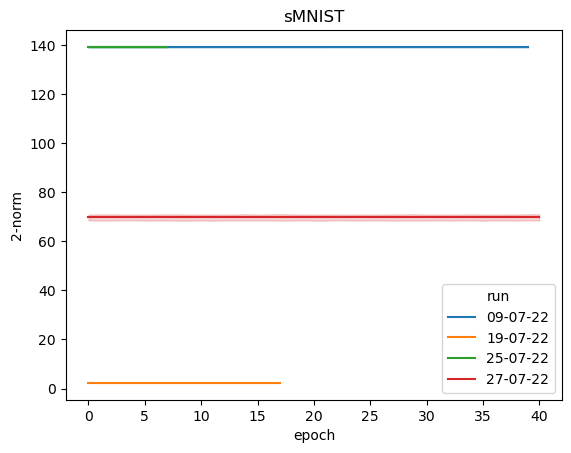

In [14]:
ax = sns.lineplot(mem_readings_df, x="epoch", y="2-norm", hue="run")
ax = ax.set(title="sMNIST")

In [17]:
# Load memory readings pmnist
mem_readings_df = pd.DataFrame()

for model in pmnist:
    mem_readings_stats = MemoryReadingsStats(path=pmnist[model]['path'])
    memory_readings_per_epoch = dict()

    for epoch in pmnist[model]['epochs']:
        mem_readings_stats.load_memory_readings(epoch=epoch)
        memory_readings_per_epoch[epoch] = mem_readings_stats.memory_readings

    for epoch, mem_readings in memory_readings_per_epoch.items():
        tmp_df = pd.DataFrame()
        tmp_df['epoch'] = [epoch]*len(mem_readings.T)
        tmp_df['2-norm'] = torch.norm(mem_readings, dim=0).cpu().numpy()
        tmp_df['run'] = [model]*len(mem_readings.T)
        mem_readings_df = pd.concat((mem_readings_df, tmp_df))

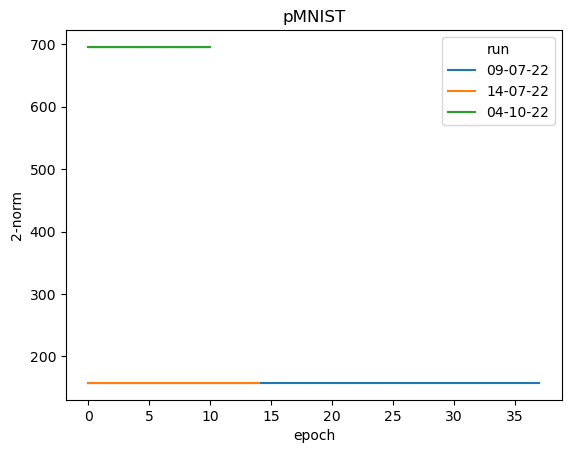

In [18]:
ax = sns.lineplot(mem_readings_df, x="epoch", y="2-norm", hue="run")
ax = ax.set(title="pMNIST")

In [28]:
# Load memory readings smnist var
mem_readings_df = pd.DataFrame()  # comment to concat

for model in smnist_var:
    mem_readings_stats = MemoryReadingsStats(path=smnist_var[model]['path'])
    memory_readings_per_epoch = dict()

    for epoch in smnist_var[model]['epochs']:
        mem_readings_stats.load_memory_readings(epoch=epoch)
        memory_readings_per_epoch[epoch] = mem_readings_stats.memory_readings

    for epoch, mem_readings in memory_readings_per_epoch.items():
        tmp_df = pd.DataFrame()
        tmp_df['epoch'] = [epoch]*len(mem_readings.T)
        tmp_df['2-norm'] = torch.norm(mem_readings, dim=0).cpu().numpy()
        tmp_df['run'] = [model+'(var)']*len(mem_readings.T)
        mem_readings_df = pd.concat((mem_readings_df, tmp_df))

Le run 09-08 e 17-08 sono analoghe e le linee coincidono

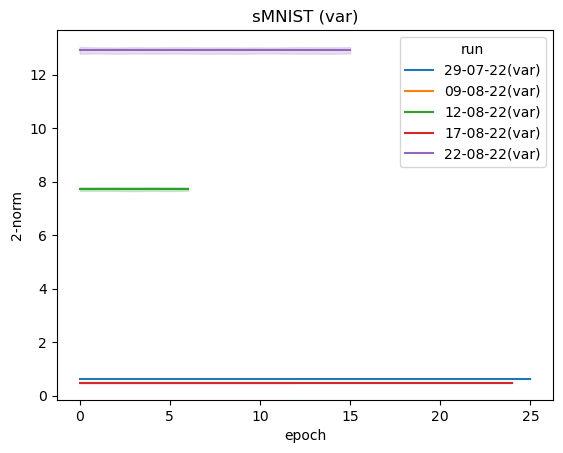

In [29]:
ax = sns.lineplot(mem_readings_df, x="epoch", y="2-norm", hue="run")
ax = ax.set(title="sMNIST (var)")

In [32]:
# Load memory readings pmnist var
mem_readings_df = pd.DataFrame()  # comment to concat

for model in pmnist_var:
    mem_readings_stats = MemoryReadingsStats(path=pmnist_var[model]['path'])
    memory_readings_per_epoch = dict()

    for epoch in pmnist_var[model]['epochs']:
        mem_readings_stats.load_memory_readings(epoch=epoch)
        memory_readings_per_epoch[epoch] = mem_readings_stats.memory_readings

    for epoch, mem_readings in memory_readings_per_epoch.items():
        tmp_df = pd.DataFrame()
        tmp_df['epoch'] = [epoch]*len(mem_readings.T)
        tmp_df['2-norm'] = torch.norm(mem_readings, dim=0).cpu().numpy()
        tmp_df['run'] = [model+'(var)']*len(mem_readings.T)
        mem_readings_df = pd.concat((mem_readings_df, tmp_df))

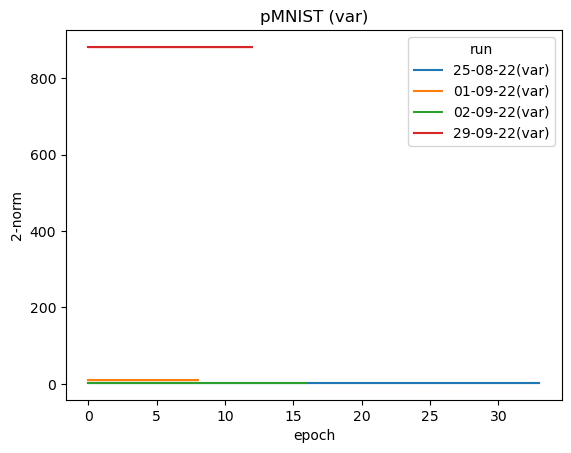

In [33]:
ax = sns.lineplot(mem_readings_df, x="epoch", y="2-norm", hue="run")
ax = ax.set(title="pMNIST (var)")